#**Projekt 2 - Python w Analizie Danych**

*Katarzyna Wiltos*  

##**Zbiór danych**

W projekcie wykorzystano zbiór danych zawierający listę książek zapisanych na portalu Goodreads wraz z przypisanymi im rozlicznymi cechami.

Zbiór danych pobrano ze strony internetowej Kaggle :   *https://www.kaggle.com/datasets/jealousleopard/goodreadsbooks*

Data pobrania danych: 05.01.2023r.

###Importowanie bibliotek 

In [344]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

###Wczytanie danych

- Pominięto linie z niepoprawnym zapisem

In [345]:
books = pd.read_csv('books.csv', on_bad_lines='skip')

###Podstawowe informacje na temat danych

In [346]:
print(f'Zbiór danych oryginalnie składa się z {books.shape[0]} wierszy i {books.shape[1]} kolumn.')

Zbiór danych oryginalnie składa się z 11123 wierszy i 12 kolumn.


Kilka przykładowych wierszy zbioru

In [347]:
books.tail(3)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher;;;
11120,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9.780140e+12,eng,415.0,820.0,95.0,8/1/1993,Penguin Books;;;
11121,45639,Poor People,William T. Vollmann,3.72,0060878827,9.780061e+12,eng,434.0,769.0,139.0,2/27/2007,Ecco;;;
11122,45641,Las aventuras de Tom Sawyer,Mark Twain,3.91,8497646983,9.788498e+12,spa,272.0,113.0,12.0,5/28/2006,Edimat Libros;;;


Informacje na temat zbioru

In [348]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  object 
 1   title               11094 non-null  object 
 2   authors             11094 non-null  object 
 3   average_rating      11094 non-null  float64
 4   isbn                11094 non-null  object 
 5   isbn13              11094 non-null  float64
 6   language_code       11094 non-null  object 
 7   num_pages           11094 non-null  float64
 8   ratings_count       11094 non-null  float64
 9   text_reviews_count  11094 non-null  float64
 10  publication_date    11094 non-null  object 
 11  publisher;;;        11094 non-null  object 
dtypes: float64(5), object(7)
memory usage: 1.0+ MB


Zbiór zawiera 12 kolumn określających kolejno numer ID ksiązki, tytuł, autorów, średnią ocen, numer isbn-10 (International Standard Book Number) oraz isbn-13, język tekstu, liczbę stron, liczbę ocen, liczbę ocen pisemnych, datę wydania i wydawnictwo.

###Przygotowanie danych do analizy

Sprawdzenie czy w zbiorze znajdują się niepełne wartości

In [349]:
books.isnull().sum()

bookID                 0
title                 29
authors               29
average_rating        29
isbn                  29
isbn13                29
language_code         29
num_pages             29
ratings_count         29
text_reviews_count    29
publication_date      29
publisher;;;          29
dtype: int64

Zauważono występowanie niepełnych wierszy.

Wyświetlenie przykładu:

In [350]:
books[books['title'].isnull()].head(2)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher;;;
5,"9,Unauthorized Harry Potter Book Seven News: ""...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,"51,Hatchet: A Guide for Using ""Hatchet"" in the...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Usunięcie niepełnych wierszy ze zbioru

(dla pewności rozważono wszystkie kolumny)

In [351]:
for column in list(books.columns):
    books.drop(books.index[(books[column].isnull())],axis=0,inplace=True)

Sprawdzenie poprawności:

In [352]:
books.isnull().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
num_pages             0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher;;;          0
dtype: int64

- Dokonano popraw w nazwach kolumn

In [353]:
books.rename(columns = {'bookID':'book_id', 'isbn':'isbn_10', 'isbn13':'isbn_13', 'publisher;;;':'publisher'}, inplace=True)

Wyświetlenie listy nazw kolumn po zmianie:

In [354]:
list(books.columns)

['book_id',
 'title',
 'authors',
 'average_rating',
 'isbn_10',
 'isbn_13',
 'language_code',
 'num_pages',
 'ratings_count',
 'text_reviews_count',
 'publication_date',
 'publisher']

- Usunięto zbędne znaki ';;;' z ostatniej kolumny w całym zbiorze

In [355]:
books['publisher'].head(1)

0    Scholastic Inc.;;;
Name: publisher, dtype: object

In [356]:
books['publisher'] = books['publisher'].str[:-3]

In [357]:
books['publisher'].head(1)

0    Scholastic Inc.
Name: publisher, dtype: object

- Usunięto zbędną kolumnę books_id z nieaktualnymi numerami ID

In [358]:
books.head(3)

,book_id,title,authors,average_rating,isbn_10,isbn_13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9.780440e+12,eng,652.0,2095690.0,27591.0,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9.780439e+12,eng,870.0,2153167.0,29221.0,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9.780440e+12,eng,352.0,6333.0,244.0,11/1/2003,Scholastic


In [359]:
del books['book_id']

- Dokonano ponownego nadania numerów ID dla zbioru ksiązek, aby były identyczne jak w bazie po usunięciu wierszy z niepełnymi danymi.

In [360]:
print(books.index.name)

None


In [361]:
books.index.name = 'book_id'

In [362]:
print(books.index.name)

book_id


In [363]:
books.head(3)

,title,authors,average_rating,isbn_10,isbn_13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
book_id,,,,,,,,,,,
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9.780440e+12,eng,652.0,2095690.0,27591.0,9/16/2006,Scholastic Inc.
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9.780439e+12,eng,870.0,2153167.0,29221.0,9/1/2004,Scholastic Inc.
2,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9.780440e+12,eng,352.0,6333.0,244.0,11/1/2003,Scholastic


- Zmieniono typ poszczególnych zmiennych:

In [364]:
convert_columns = {'num_pages': int, 'ratings_count': int, 'text_reviews_count': int}
books = books.astype(convert_columns)
books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11094 entries, 0 to 11122
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               11094 non-null  object 
 1   authors             11094 non-null  object 
 2   average_rating      11094 non-null  float64
 3   isbn_10             11094 non-null  object 
 4   isbn_13             11094 non-null  float64
 5   language_code       11094 non-null  object 
 6   num_pages           11094 non-null  int32  
 7   ratings_count       11094 non-null  int32  
 8   text_reviews_count  11094 non-null  int32  
 9   publication_date    11094 non-null  object 
 10  publisher           11094 non-null  object 
dtypes: float64(2), int32(3), object(6)
memory usage: 910.1+ KB


###Dane po przygotowaniu

In [365]:
books.sample(5)

,title,authors,average_rating,isbn_10,isbn_13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
book_id,,,,,,,,,,,
424,The Pilgrimage: A Contemporary Quest for Ancie...,Paulo Coelho/Alan R. Clarke,3.64,006251279X,9.780063e+12,en-US,272,888,92,5/1/1995,HarperOne
1845,In the Dark of the Night,John Saul,3.88,034548701X,9.780345e+12,eng,324,4278,178,7/18/2006,Ballantine Books
2272,Laughter in the Dark,Vladimir Nabokov,3.97,0811216748,9.780811e+12,eng,292,8717,477,9/17/2006,New Directions
10088,Ray Bradbury's Fahrenheit 451,Harold Bloom,4.18,0791059294,9.780791e+12,eng,147,991,52,12/31/2001,Chelsea House Publications
3114,Cathedral,Raymond Carver,4.28,0679723692,9.780680e+12,eng,230,21895,894,6/18/1989,Vintage Contemporaries


In [366]:
print(f'Zbiór danych po przygotowaniu składa się z {books.shape[0]} wierszy i {books.shape[1]} kolumn. \nLiczba wierszy zmniejszyła się z 11123 do 11094, po usunięciu wierszy z wartościami NaN.')

Zbiór danych po przygotowaniu składa się z 11094 wierszy i 11 kolumn. 
Liczba wierszy zmniejszyła się z 11123 do 11094, po usunięciu wierszy z wartościami NaN.


### **Analiza danych**

###Dane do analizy

Przykład kilku wierszy:

In [367]:
books.head(3)

,title,authors,average_rating,isbn_10,isbn_13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
book_id,,,,,,,,,,,
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9.780440e+12,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9.780439e+12,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9.780440e+12,eng,352,6333,244,11/1/2003,Scholastic


- Wyznaczenie liczby różnych języków książek ze zbioru:

In [368]:
languages_all = books['language_code'].value_counts().to_dict()
len(languages_all)

27

Określenie poszczególnych wartości:

In [369]:
languages_all

{'eng': 8885,
 'en-US': 1403,
 'spa': 218,
 'en-GB': 213,
 'fre': 144,
 'ger': 99,
 'jpn': 46,
 'mul': 19,
 'zho': 14,
 'grc': 11,
 'por': 10,
 'en-CA': 7,
 'ita': 5,
 'enm': 3,
 'lat': 3,
 'swe': 2,
 'rus': 2,
 'srp': 1,
 'nl': 1,
 'msa': 1,
 'glg': 1,
 'wel': 1,
 'ara': 1,
 'nor': 1,
 'tur': 1,
 'gla': 1,
 'ale': 1}

Utworzono ramkę danych zawierającą kody języków wraz z liczbą książek w nich napisanych, ale tylko dla pierwszych 16 wartości z największą liczbą publikacji.

In [370]:
languages = (pd.DataFrame.from_dict(languages_all, orient='index').reset_index()).head(16)
languages = languages.set_axis(['language_code', 'num_of_books'], axis='columns', copy=False).sort_values('num_of_books', ascending=False)
languages

,language_code,num_of_books
0,eng,8885
1,en-US,1403
2,spa,218
3,en-GB,213
4,fre,144
5,ger,99
6,jpn,46
7,mul,19
8,zho,14
9,grc,11


####**Języki z największą liczbą publikacji**

<Figure size 1500x600 with 0 Axes>

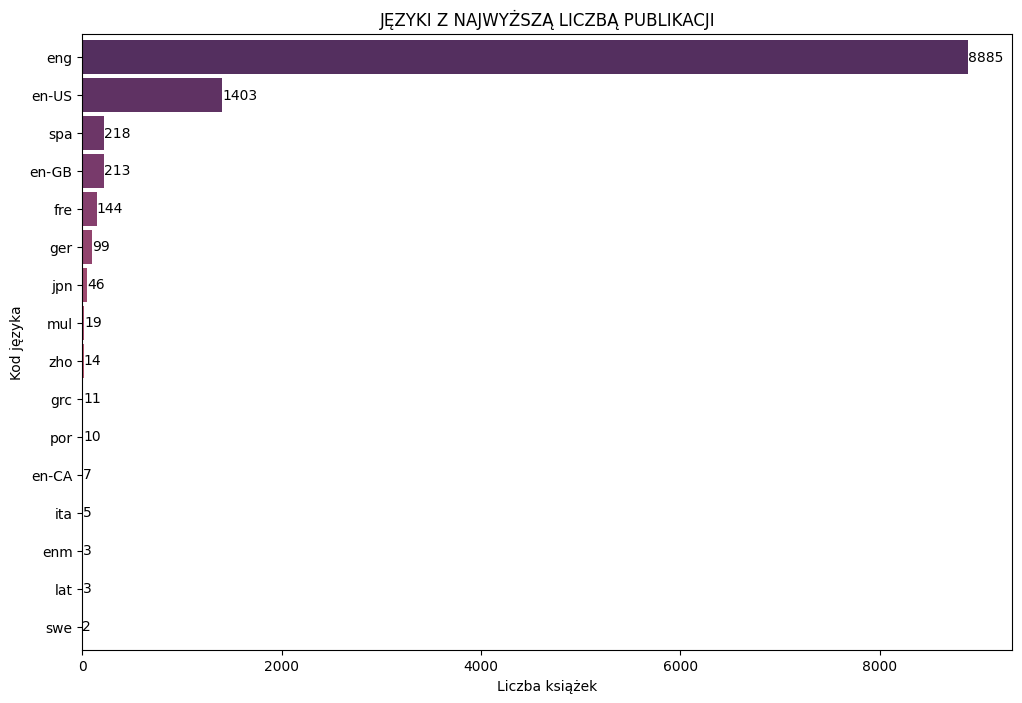

In [371]:
plt.figure(figsize=(15, 6))
plt.subplots(figsize=(12,8))
ax = sns.barplot(data=languages, x='num_of_books', y='language_code', errwidth=0, orient='h', palette='flare_r', width=0.9)
ax.set(xlabel='Liczba książek', ylabel='Kod języka', title='JĘZYKI Z NAJWYŻSZĄ LICZBĄ PUBLIKACJI')
ax.autoscale_view()
ax.margins(y=0.01, x=0.05)
labels = ax.bar_label(ax.containers[0])

> Z powyższego wykresu można wywnioskować, iż najwięcej książek ze zbioru została napisana w języku angielskim, następnie hiszpańskim, francuskim, niemieckim, japońskim, mul - multiple languages (w wielu językach), chińskim, greckim, portugalskim, włoskim, łacinie, staroangielskim oraz szwedzkim.

####**Wykres kołowy języków książek**

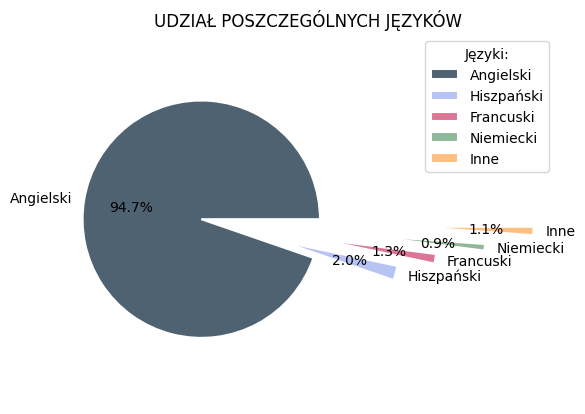

In [372]:
eng_books = languages[languages['language_code'].isin(['eng','en-US','en-GB','en-CA'])]['num_of_books'].sum()

other_languages = sum([num for num in list(languages_all.values()) if num <= 46 and num != 7])

colors = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897', '#FFBF80']
explode = (0.0,0.7,1,1.4,1.8)

y = np.array([eng_books, 218, 144, 99, other_languages])
mylabels = ["Angielski", "Hiszpański", "Francuski", "Niemiecki", "Inne"]

fig1, ax = plt.subplots()
ax.pie(y, labels = mylabels, autopct='%1.1f%%', wedgeprops = { 'linewidth' : 1.5, 'edgecolor' : 'white' }, colors=colors, explode = explode)

plt.legend(title = "Języki:")
ax.axis('equal')  
plt.title('UDZIAŁ POSZCZEGÓLNYCH JĘZYKÓW', fontsize=12)

plt.show() 


> Można zauważyć, iż największą liczbę opublikowanych tytułów ze zbioru stanowią ksiązki w języku angielskim - aż 94.7%, następnie w mniejszości znajdują się pozycje w języku hiszpańskim - 2%, francuskim 1.3%, niemieckim 0.9% oraz inne, które łącznie stanowią 1.1% całości.

####**Najpopularniejsze książki w języku hiszpańskim **

In [373]:
spanish_books = books[books['language_code']=='spa']
top_spanish_books = spanish_books.sort_values('ratings_count',ascending=False).head(15)
top_spanish_books.head(3)

,title,authors,average_rating,isbn_10,isbn_13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
book_id,,,,,,,,,,,
2130,Jurassic Park (Jurassic Park #1),Michael Crichton,4.02,030734813X,9.780307e+12,spa,480,451443,3647,4/4/2006,Plaza y Janes
2859,Cujo,Stephen King,3.71,0307348245,9.780307e+12,spa,432,197993,2816,6/6/2006,Plaza y Janés
2852,Insomnia,Stephen King/Bettina Blanch Tyroller,3.82,8497597729,9.788498e+12,spa,890,117901,2028,2/28/2005,Debolsillo


<Figure size 1200x600 with 0 Axes>

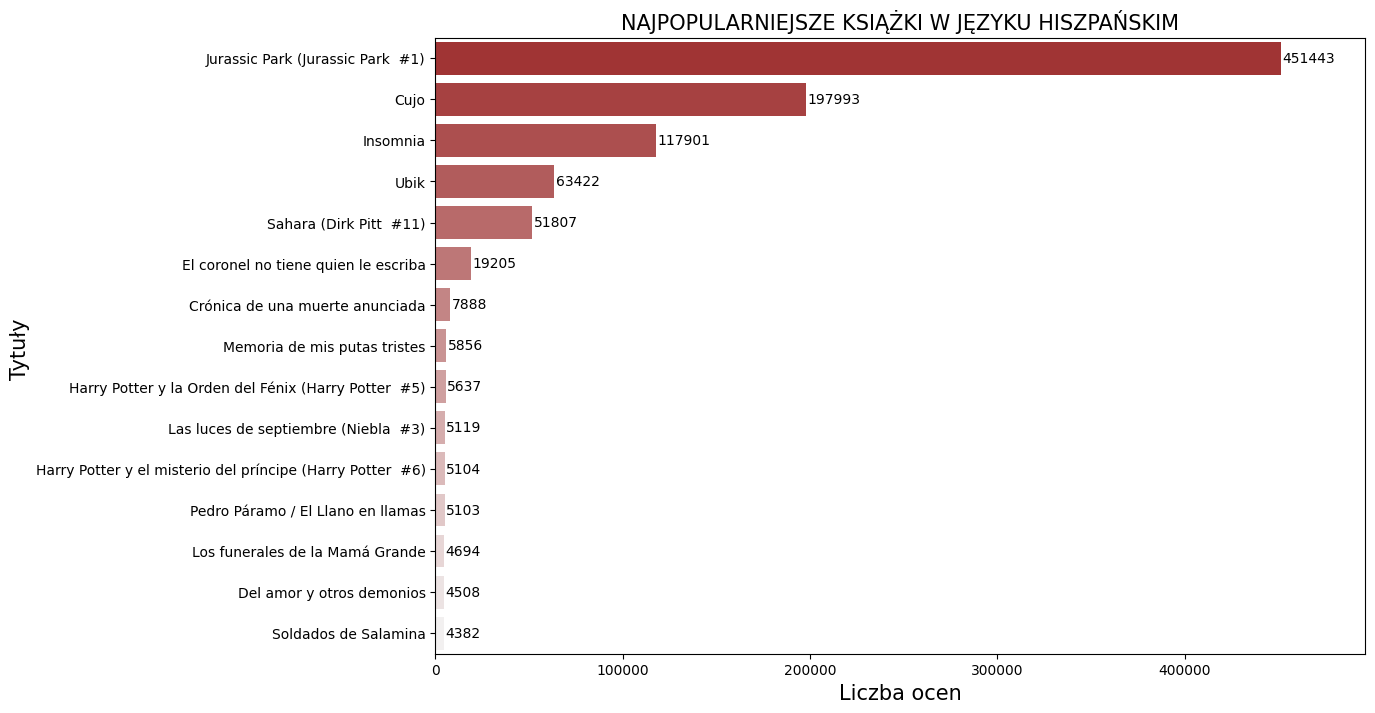

In [434]:
plt.figure(figsize=(12, 6))
plt.subplots(figsize=(12,8))
ax = sns.barplot(x = 'ratings_count', y = 'title', data=top_spanish_books, palette='light:firebrick_r')
ax.set_xlabel("Liczba ocen", fontsize=15)
ax.set_ylabel("Tytuły ", fontsize=15)
ax.set_title("NAJPOPULARNIEJSZE KSIĄŻKI W JĘZYKU HISZPAŃSKIM",fontsize=15,color='black')
ax.margins(x=0.1)
for c in ax.containers:
    #ax.bar_label(c, labels=top_spanish_books.average_rating, label_type='center')
    ax.bar_label(c, labels=list(top_spanish_books['ratings_count']), label_type='edge', padding=1)

> Z wykresu można odczytać tytuły najpopularniejszych książek w języku hiszpańskim.

####**Najpopularniejsze ksiązki w języku francuskim**

In [375]:
french_books = books[books['language_code']=='fre']
top_french_books = french_books.sort_values('ratings_count',ascending=False).head(15)
top_french_books.head(3)

,title,authors,average_rating,isbn_10,isbn_13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
book_id,,,,,,,,,,,
2870,Christine,Stephen King/Marie Milpois,3.77,2253147699,9.782253e+12,fre,411,178403,2088,6/13/2001,LGF
3151,Dreamcatcher,Stephen King/William Olivier Desmond/Maria Ter...,3.63,2226131906,9.782226e+12,fre,688,136312,1617,3/1/2002,Albin Michel
6368,Trainspotting,Irvine Welsh/Eric Lindor Fall,4.09,2020336464,9.782020e+12,fre,344,59077,857,3/6/1998,Seuil


<Figure size 2000x600 with 0 Axes>

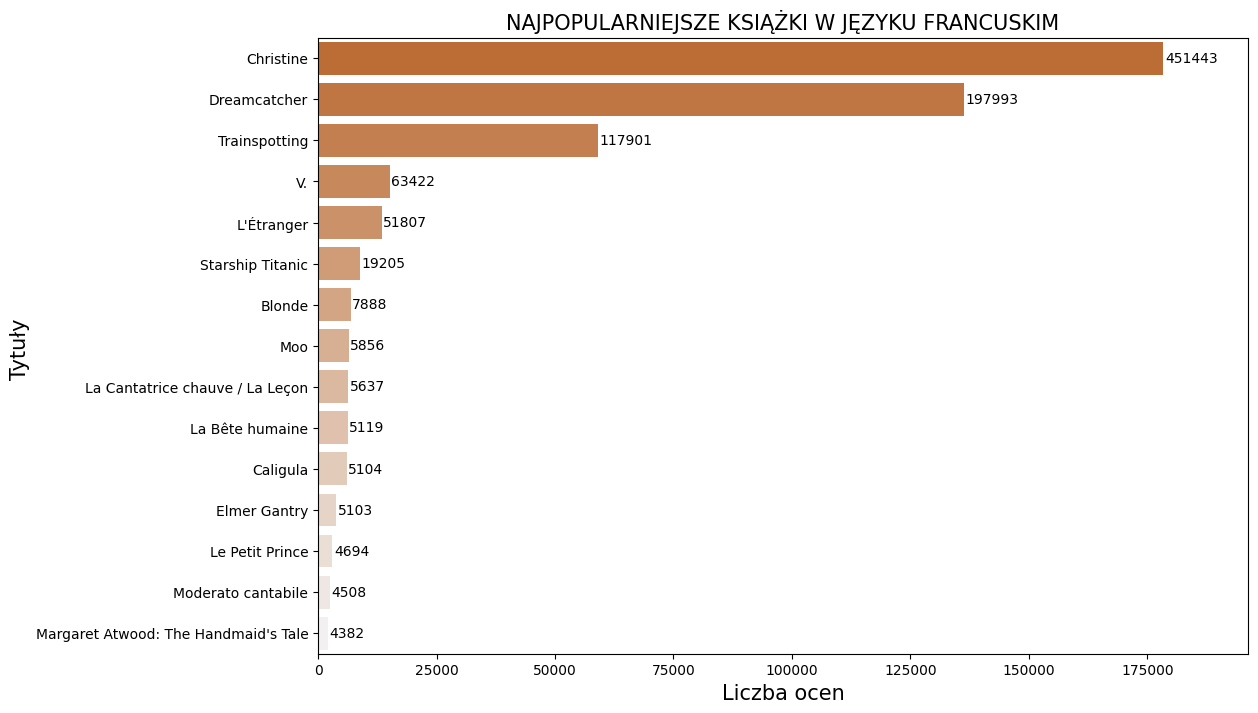

In [440]:
plt.figure(figsize=(20, 6))
plt.subplots(figsize=(12,8))
ax = sns.barplot(x = 'ratings_count', y = 'title', data=top_french_books, palette='light:chocolate_r')
ax.set_xlabel("Liczba ocen", fontsize=15)
ax.set_ylabel("Tytuły ", fontsize=15)
ax.set_title("NAJPOPULARNIEJSZE KSIĄŻKI W JĘZYKU FRANCUSKIM",fontsize=15,color='black')
ax.margins(x=0.1)
for c in ax.containers:
    ax.bar_label(c, labels=list(top_spanish_books['ratings_count']), label_type='edge', padding=1)

> Z wykresu można odczytać tytuły najpopularniejszych książek w języku francuskim.

####**Najpopularniejsze książki w języku angielskim - najczęściej oceniane**

<Figure size 1500x600 with 0 Axes>

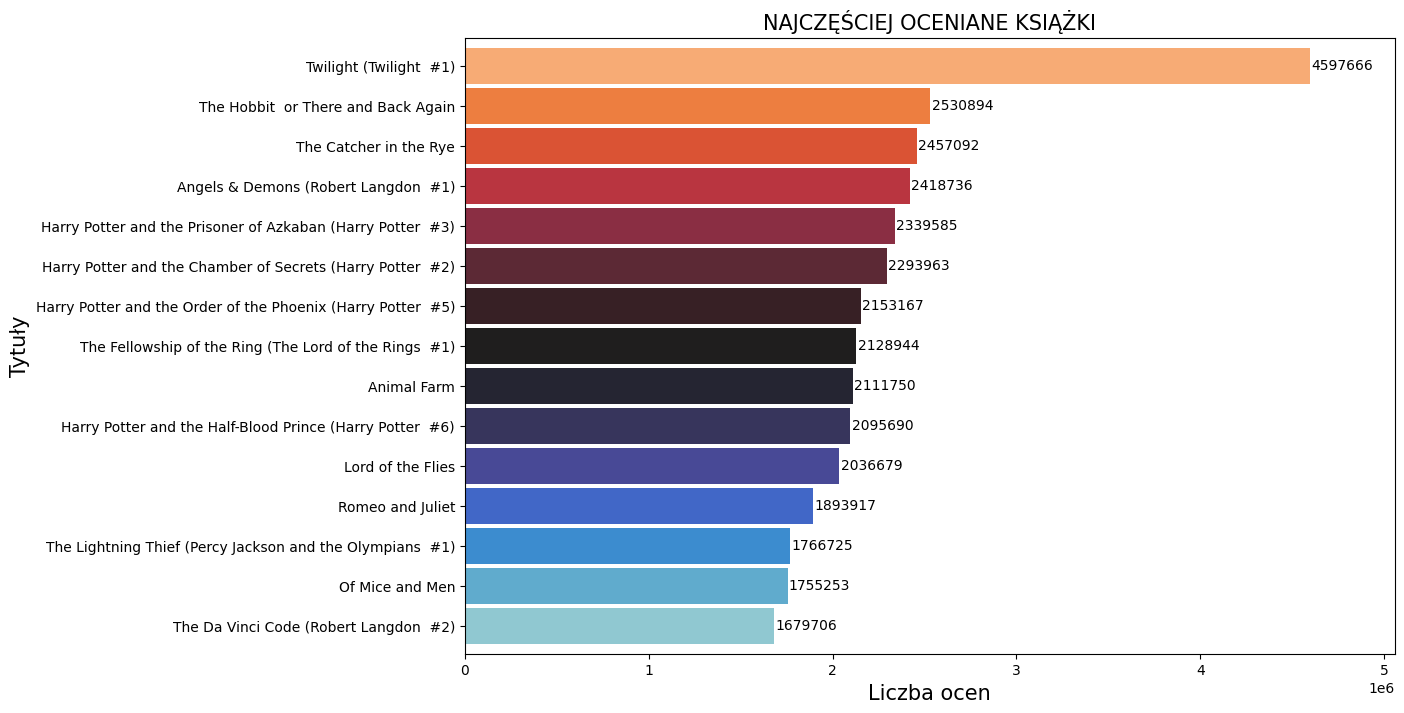

In [377]:
most_rated = books.sort_values('ratings_count',ascending=False).head(15).set_index('title').sort_values(by ='ratings_count', ascending=True)
plt.figure(figsize=(15, 6))
plt.subplots(figsize=(12,8))
ax = most_rated['ratings_count'].astype(int).plot.barh(width=0.9,color=sns.color_palette('icefire',15))
ax.set_xlabel("Liczba ocen", fontsize=15)
ax.set_ylabel("Tytuły", fontsize=15)
ax.set_title("NAJCZĘŚCIEJ OCENIANE KSIĄŻKI",fontsize=15,color='black')
ax.margins(y=0.01, x=0.1)
for c in ax.containers:
    ax.bar_label(c, labels=list(most_rated['ratings_count'].head(15).astype(int)), label_type='edge', padding=1)
plt.show()

> Na podstawie powyższego wykresu można zauważyć tytuły książek, które posiadają najwyższą liczbę opinii.

> Należą do nich między innymi tyuły takie jak: "Twilight #1" - "Zmierzch", "The Hobbit or There and Back Again" - "Hobbit, czyli tam i z powrotem", "The Cathcer in the Rye" - "Buszujący w zbożu", "Angels & Demons" - "Anioły i demony", czy "Harry Potter and the Prisoner of Azkaban" - "Harry Potter i więzień Azkabanu".

####**15 autorów z najwyższą liczbą tytułów**

In [378]:
books.groupby('authors')['title'].count().reset_index().sort_values('title', ascending=False).head(15).set_axis(['authors', 'num_of_books'],axis='columns',copy=False)

,authors,num_of_books
4732,P.G. Wodehouse,40
5767,Stephen King,39
5452,Rumiko Takahashi,39
4696,Orson Scott Card,35
46,Agatha Christie,33
4971,Piers Anthony,30
5510,Sandra Brown,29
4290,Mercedes Lackey,29
1397,Dick Francis,28
2776,James Patterson,23


<Figure size 2000x600 with 0 Axes>

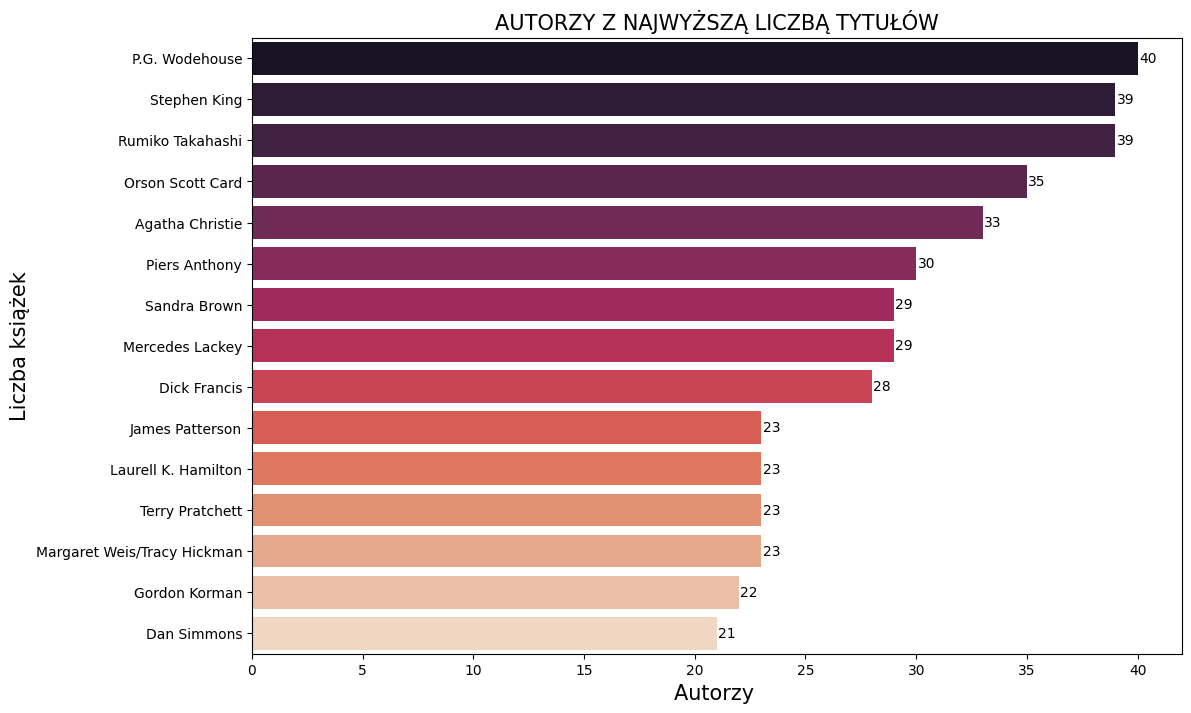

In [460]:
authors = books.groupby('authors')['title'].count().reset_index().sort_values('title', ascending=False).head(15).set_axis(['authors', 'num_of_books'], axis='columns', copy=False)
plt.figure(figsize=(20, 6))
plt.subplots(figsize=(12,8))
ax = sns.barplot(x = 'num_of_books', y = 'authors', data=authors, palette="rocket")
ax.set_xlabel("Autorzy ", fontsize=15)
ax.set_ylabel("Liczba książek", fontsize=15)
ax.set_title("AUTORZY Z NAJWYŻSZĄ LICZBĄ TYTUŁÓW",fontsize=15,color='black')
for c in ax.containers:
    ax.bar_label(c, labels=list(authors['num_of_books']), label_type='edge', padding=1)

> Z powyższego wykresu można odczytać autorów z najwyższą liczbą opublikowanych tytułów.

####**20 najwyżej ocenianych autorów**

In [380]:
high_rated_author = books[books['average_rating']>=4.0][books['ratings_count']>=350000].sort_values(by='average_rating', ascending=False)
#high_rated_author = high_rated_author.groupby('authors')['title'].count().reset_index().sort_values('title', ascending = False).head(15).set_axis(['authors', 'num_of_high_rating'], axis='columns', copy=False)


C:\Users\Kasia\AppData\Local\Temp\ipykernel_5020\2212769742.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  high_rated_author = books[books['average_rating']>=4.0][books['ratings_count']>=350000].sort_values(by='average_rating', ascending=False)


- Utworzenie ramki danych na podstawie oryginalnej z obliczoną średnią wartością ocen wszystkich wydanych publikacji dla każdego z najpopularniejszych autorów.

In [381]:
author_rating = high_rated_author.groupby('authors')['average_rating'].sum().reset_index()
author_rating['average_rating'] = author_rating['average_rating']/high_rated_author.groupby('authors')['average_rating'].count().reset_index()['average_rating']
author_rating = author_rating.sort_values(by='average_rating', ascending=False).head(20)
author_rating = author_rating.round(decimals=2)
author_rating = author_rating.sort_values(by='authors')

- Utworzenie ramki danych na podstawie oryginalnej z obliczoną średnią wartością liczby otrzymanych ocen dla każdego z najpopularniejszych autorów.

In [382]:
author_count = high_rated_author[high_rated_author['authors'].isin(list(author_rating['authors']))].groupby('authors')['ratings_count'].sum().reset_index()
author_count['ratings_count'] = (author_count['ratings_count']/high_rated_author[high_rated_author['authors'].isin(list(author_rating['authors']))].groupby('authors')['ratings_count'].count().reset_index()['ratings_count']).astype(int)
author_count.head(20)
author_count = author_count.sort_values(by='authors')

<Figure size 2000x600 with 0 Axes>

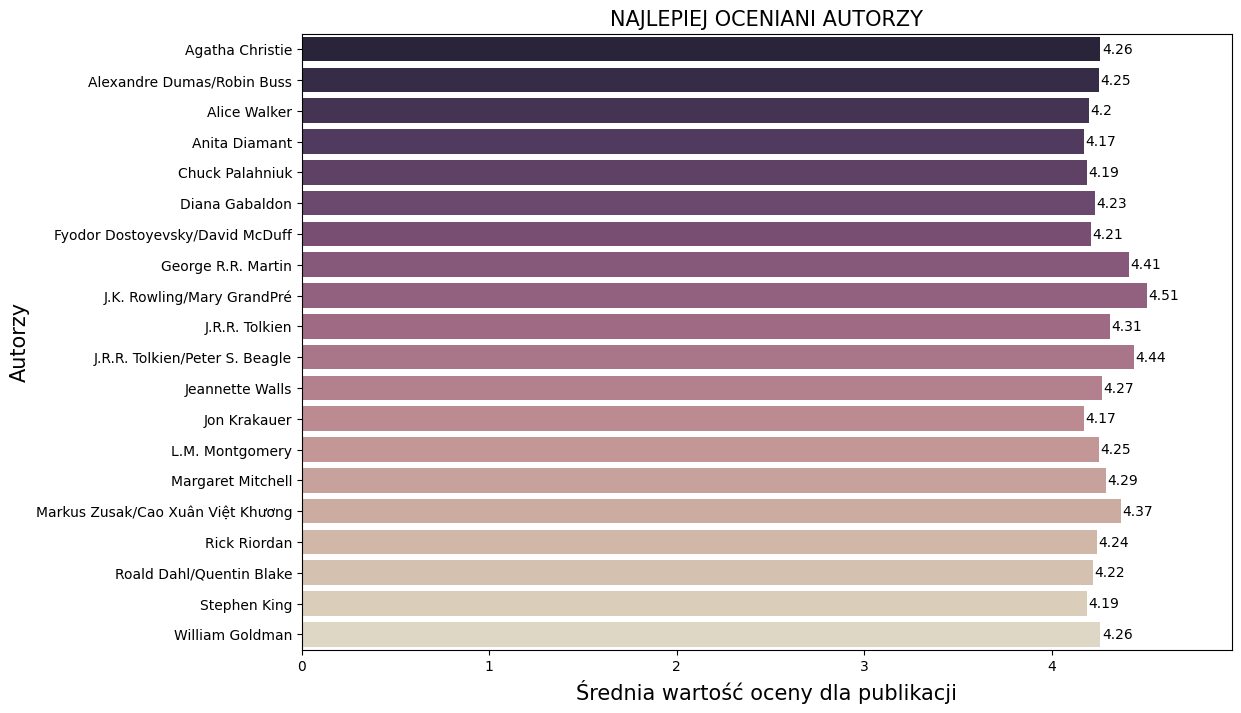

In [383]:
plt.figure(figsize=(20, 6))
plt.subplots(figsize=(12,8))
ax = sns.barplot(x = 'average_rating', y = 'authors', data=author_rating, palette='ch:s=-.2,r=.6_r')
ax.set_xlabel("Średnia wartość oceny dla publikacji", fontsize=15)
ax.set_ylabel("Autorzy", fontsize=15)
ax.set_title("NAJLEPIEJ OCENIANI AUTORZY",fontsize=15,color='black')
ax.margins(x=0.1)
for c in ax.containers:
    #ax.bar_label(c, labels=top_spanish_books.average_rating, label_type='center')
    ax.bar_label(c, labels=list(author_rating['average_rating']), label_type='edge', padding=1)

> Z powyższego wykresu można odczytać najlepiej ocenianych autorów, gdzie wartość dla każdego autora została obliczona jako średnia dla wszystkich publikacji wydanych przez autora.

<Figure size 2000x600 with 0 Axes>

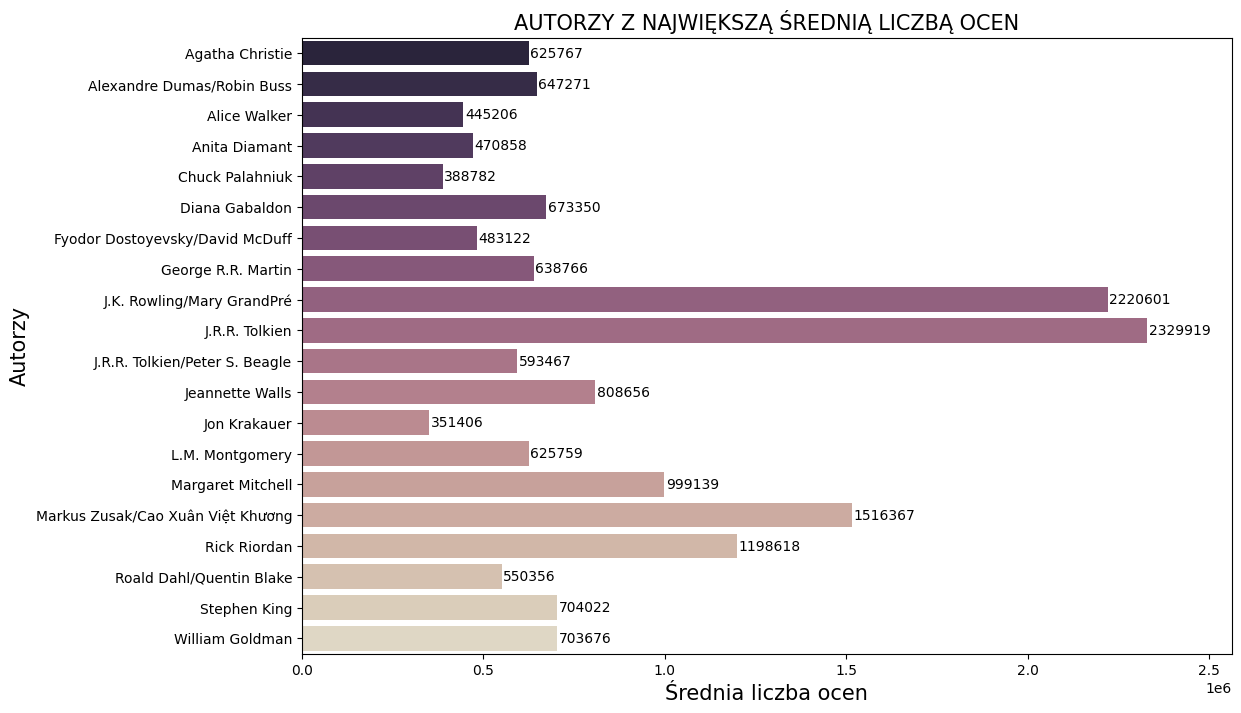

In [384]:
plt.figure(figsize=(20, 6))
plt.subplots(figsize=(12,8))
ax = sns.barplot(x = 'ratings_count', y = 'authors', data=author_count, palette='ch:s=-.2,r=.6_r')
ax.set_xlabel("Średnia liczba ocen", fontsize=15)
ax.set_ylabel("Autorzy", fontsize=15)
ax.set_title("AUTORZY Z NAJWIĘKSZĄ ŚREDNIĄ LICZBĄ OCEN",fontsize=15,color='black')
ax.margins(x=0.1)
for c in ax.containers:
    #ax.bar_label(c, labels=top_spanish_books.average_rating, label_type='center')
    ax.bar_label(c, labels=list(author_count['ratings_count']), label_type='edge', padding=1)

> Z powyższego wykresu można odczytać średnią wartość liczby wszystkich otrzymanych ocen dla każdego z najpopularniejszych autorów uporządkowanych alfabetycznie.

W celu badania ciekawych zależności między wyznaczonymi wartościami dokonano ich normalizacji i zestawienia na poniższych wykresach.

In [385]:
def normalize_data(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

In [386]:
author_count['ratings_count'] = normalize_data(author_count['ratings_count'])
author_rating['average_rating'] = normalize_data(author_rating['average_rating'])

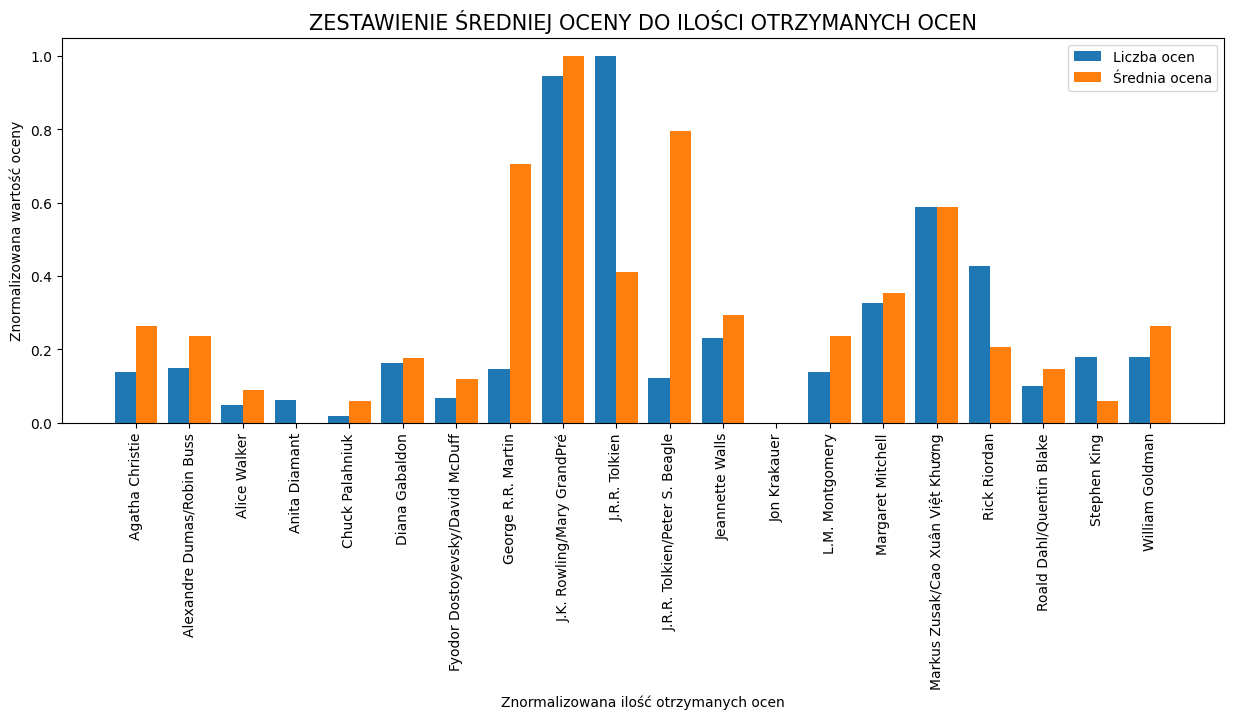

In [387]:
plt.figure(figsize=(15, 5))
x = author_count['authors']
y_avg = author_rating['average_rating']
z_count = author_count['ratings_count']
  
x_axis = np.arange(len(x))
  
plt.bar(x_axis - 0.2, z_count, 0.4, label = 'Liczba ocen')
plt.bar(x_axis + 0.2, y_avg, 0.4, label = 'Średnia ocena' )
  
plt.xticks(x_axis, x, rotation=90)
plt.xlabel("Znormalizowana ilość otrzymanych ocen")
plt.ylabel("Znormalizowana wartość oceny")
plt.title("ZESTAWIENIE ŚREDNIEJ OCENY DO ILOŚCI OTRZYMANYCH OCEN",fontsize=15)
plt.legend()
plt.show()

Rozważano istnienie korelacji między średnią wartością oceny dla danego autora a średnią liczbą otrzymanych ocen. Z powyższego wykresu można domniemywać jej istnienia, jednak występują przypadki, które odstają od założenia.

Wykonano kolejny wykres, który lepiej obrazuje zauważoną zależność.

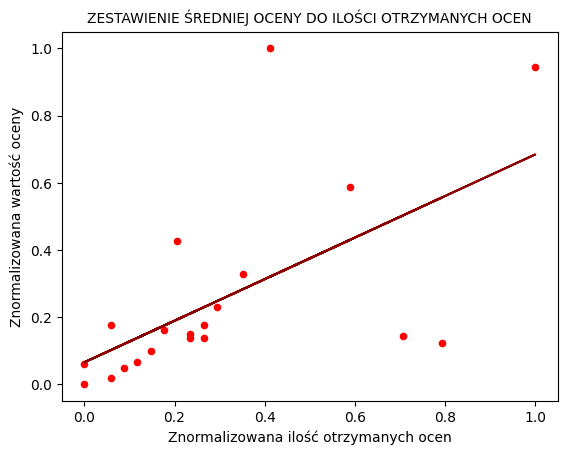

In [467]:
x  = list(author_rating['average_rating'])
y = list(author_count['ratings_count'])
plt.scatter(x, y , c = 'red', s=20)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), c='darkred')
plt.title("ZESTAWIENIE ŚREDNIEJ OCENY DO ILOŚCI OTRZYMANYCH OCEN",fontsize=10)
plt.xlabel("Znormalizowana ilość otrzymanych ocen")
plt.ylabel("Znormalizowana wartość oceny")
plt.show()

- Zbadanie korelacji poprzez macierz:

C:\Users\Kasia\AppData\Local\Temp\ipykernel_5020\3499031379.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(author_all.corr(), annot=True, linewidths=0.5, fmt='.2f', ax=ax, cmap='rocket_r')


<AxesSubplot: >

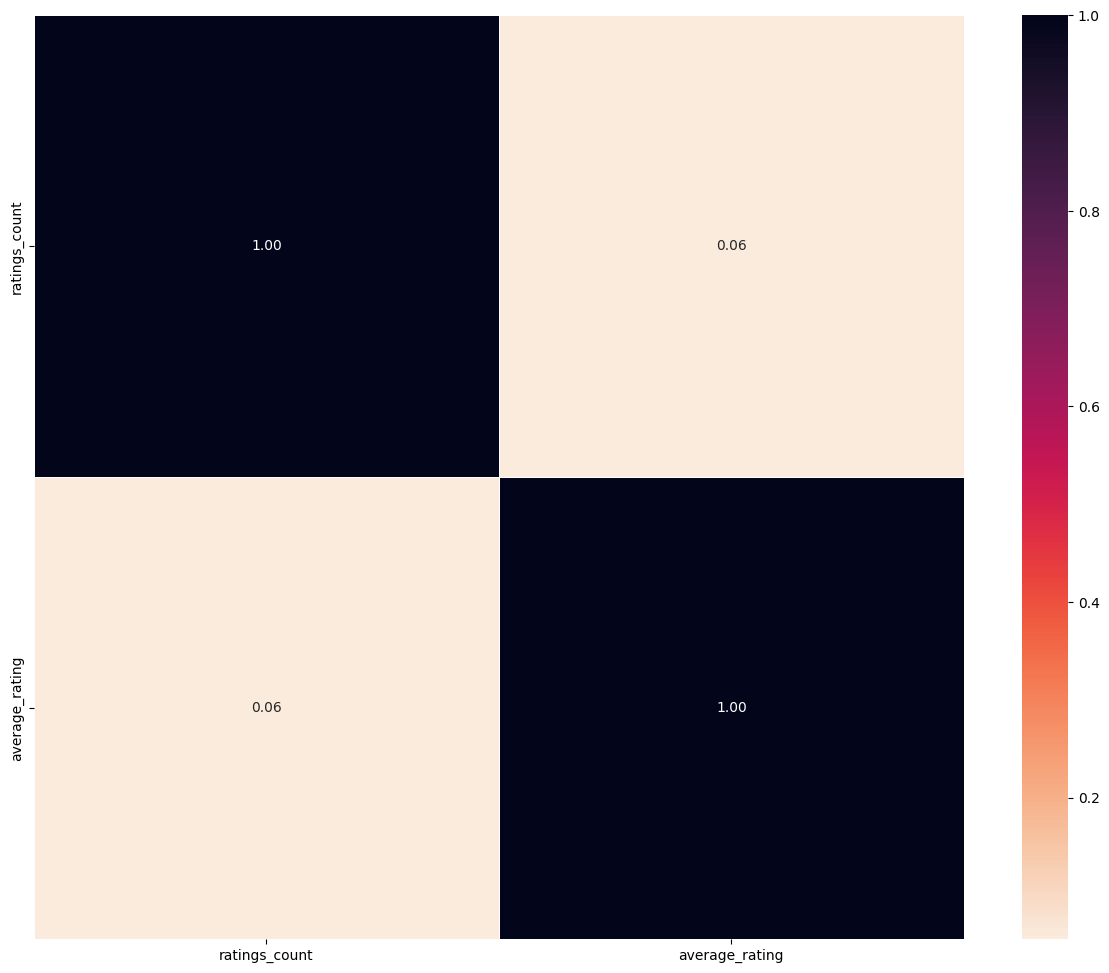

In [409]:
author_all = author_count
author_all = author_all.join(author_rating['average_rating'])

f, ax = plt.subplots(figsize=(15,12))
sns.heatmap(author_all.corr(), annot=True, linewidths=0.5, fmt='.2f', ax=ax, cmap='rocket_r')

> Na podstawie otrzymanych wyników, można wnioskować, iż jest możliwe istnienie drobnej korelacji między rozważanymi zmiennymi.

####**Zbadanie zależności między wszystkimi cechami zbioru**

C:\Users\Kasia\AppData\Local\Temp\ipykernel_5020\2491648656.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(books.corr(), annot=True, linewidths=0.5, fmt='.2f', ax=ax, cmap='rocket_r')


<AxesSubplot: >

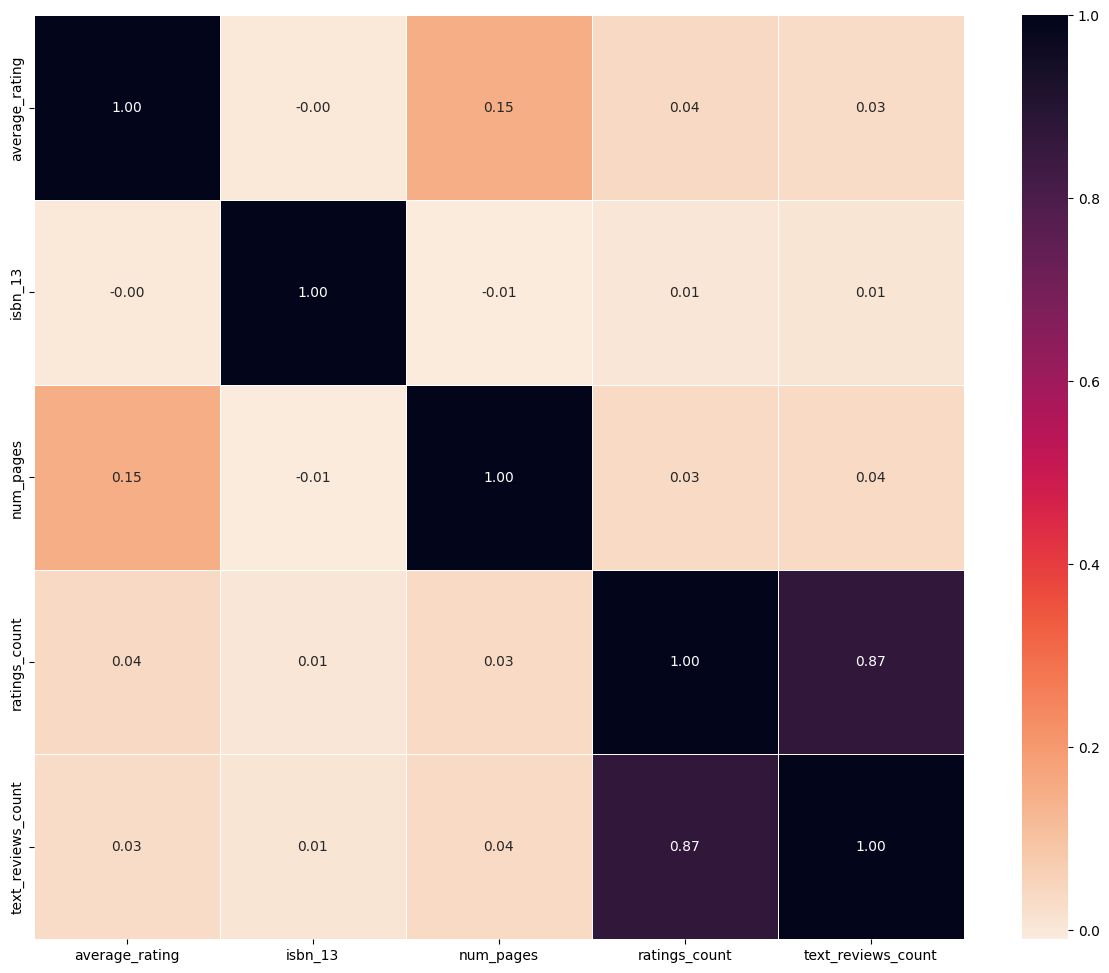

In [390]:
f, ax = plt.subplots(figsize=(15,12))
sns.heatmap(books.corr(), annot=True, linewidths=0.5, fmt='.2f', ax=ax, cmap='rocket_r')

> Można zauważyć silną korelację między liczbą ocen a liczbą ocen tekstowych oraz nieco słabszą między liczbą stron a średnią oceną.

- Zestawienie liczby ocen tekstowych do liczby ocen ogółem

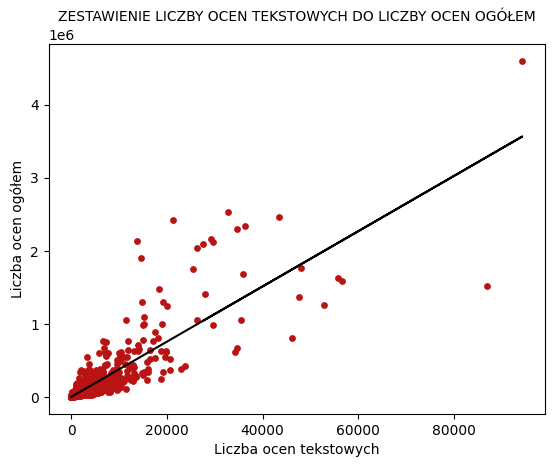

In [465]:
x = list(books['text_reviews_count'])
y = list(books['ratings_count'])
plt.scatter(x, y, c = '#b91313', s=15)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), c='black')
plt.title("ZESTAWIENIE LICZBY OCEN TEKSTOWYCH DO LICZBY OCEN OGÓŁEM",fontsize=10)
plt.xlabel("Liczba ocen tekstowych")
plt.ylabel("Liczba ocen ogółem")
plt.show()

> Można zaobserwować silną korelację.

- Zestawienie liczby stron do liczby ocen ogółem

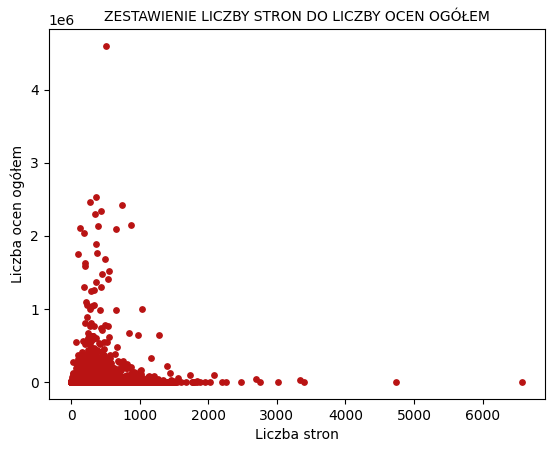

In [463]:
x = list(books['num_pages'])
y = list(books['ratings_count'])
plt.scatter(x, y, c = '#b91313', s=15)
plt.title("ZESTAWIENIE LICZBY STRON DO LICZBY OCEN OGÓŁEM",fontsize=10)
plt.xlabel("Liczba stron")
plt.ylabel("Liczba ocen ogółem")
plt.show()

> Można zauważyć zależność wykładniczą.

- Zestawienie średnich ocen do liczby ocen ogółem

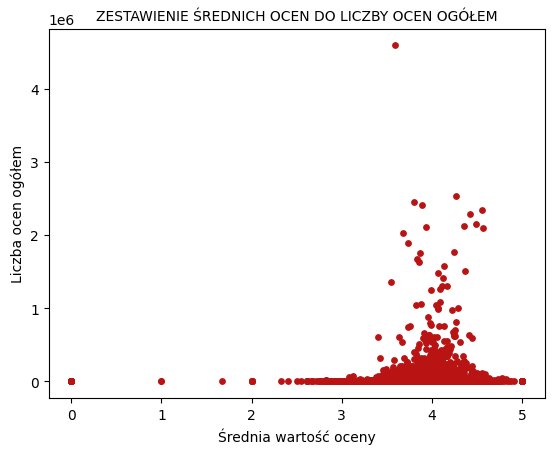

In [462]:
plt.scatter(x = list(books['average_rating']), y = list(books['ratings_count']), c = '#b91313', s=15)
plt.title("ZESTAWIENIE ŚREDNICH OCEN DO LICZBY OCEN OGÓŁEM",fontsize=10)
plt.xlabel("Średnia wartość oceny")
plt.ylabel("Liczba ocen ogółem")
plt.show()

> Trudno jednoznacznie określić rodzaj występującej korelacji, jednak jest ona dość słabego stopnia.

####**Ilość książek w danym roku**

In [394]:
years = books.groupby(books['publication_date'].str[-4:])['title'].count().reset_index().sort_values('publication_date', ascending = False).head(50)
years.sample(3)

,publication_date,title
52,1986,72
80,2014,9
53,1987,87


- Zestawienie liczby wydanych tytułów na przełomie ostatnich 50 lat

C:\Users\Kasia\AppData\Local\Temp\ipykernel_5020\3217257025.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  labels_x = ax.set_xticklabels(labels, rotation=45)


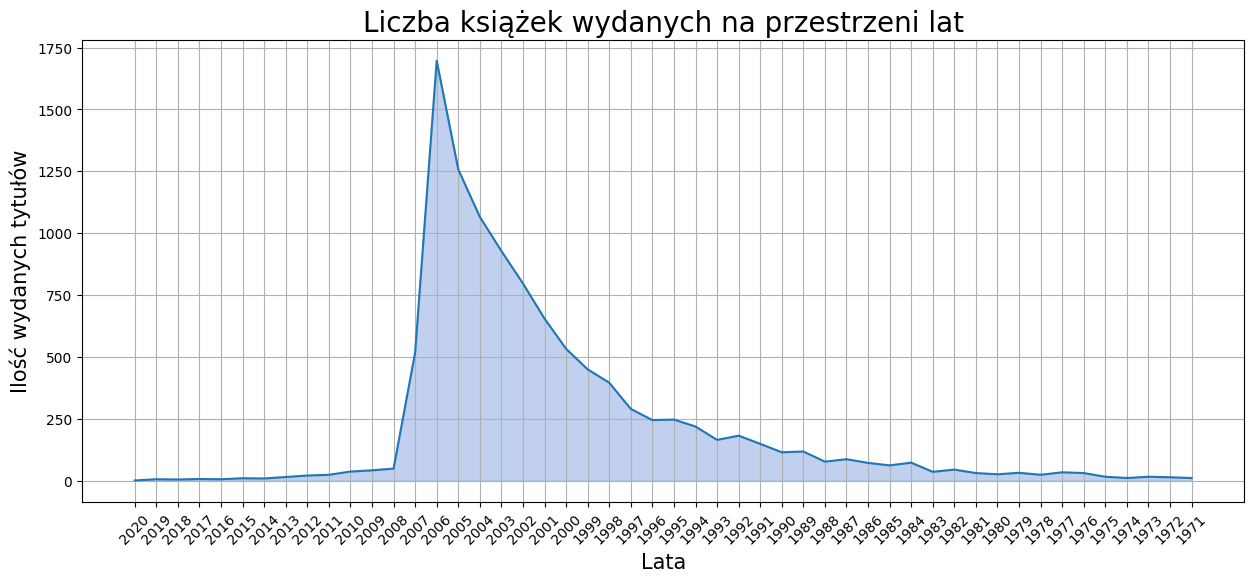

In [395]:
plt.figure(figsize=(15, 6))
ax = sns.lineplot(data=years, x = 'publication_date', y='title')
labels = years['publication_date']
plt.fill_between(years.publication_date.values, years.title.values, color='#85a3e0', alpha=.5)
labels_x = ax.set_xticklabels(labels, rotation=45)
ax.set_xlabel("Lata", fontsize=15)
ax.set_ylabel("Ilość wydanych tytułów", fontsize=15)
ax.set_title("Liczba książek wydanych na przestrzeni lat",fontsize=20,color='black')
plt.grid()

> Baza danych jest stosunkowo nowa, zatem można wnioskować, iż widoczny wzrost liczby publikacji jest spowodowany większą liczbą częściej uzupełnianych informacji. Natomiast nagły spadek liczby publikacji od roku 2006 może być spowodowany wieloma czynnikami. Jednym z powodów może być fatk, iż data publikacji oznacza datę publikacji danego wydania, a nie jak mogłoby się wydawać ogólną datę publikacji danego tytułu. Zatem lata, w których liczba ta utrzymuje się na wysokim poziomie mógł nastąpić ogólny trend aktualizacji wydań i publikacji kolejnych, po czym pozostał jedynie poziom przedstawiający nowe tytuły książek. 


####**Wydawnictwa z największą liczbą opublikowanych książek i ich średnia ocen**

- Wyznaczenie 20 wydawnictw z najwyższą liczbą publikacji.

In [396]:
publisher_count = books.groupby('publisher')['title'].count().reset_index().sort_values(by='title' ,ascending=False).head(20)
publisher_count

,publisher,title
2150,Vintage,318
1504,Penguin Books,261
1521,Penguin Classics,184
1245,Mariner Books,148
190,Ballantine Books,144
903,HarperCollins,112
1594,Pocket Books,111
893,Harper Perennial,111
193,Bantam,110
2119,VIZ Media LLC,88


- Wyznaczenie średnich ocen dla 20 wydawnictw z najwyższą liczbą publikacji.

In [397]:
publisher_rating = books.groupby('publisher')['average_rating'].sum().reset_index().sort_values(by='average_rating' ,ascending=False).head(20)
publisher_rating['average_rating'] = publisher_rating['average_rating']/publisher_count['title']
publisher_rating

,publisher,average_rating
2150,Vintage,3.894182
1504,Penguin Books,3.920383
1521,Penguin Classics,3.944565
1245,Mariner Books,3.932432
190,Ballantine Books,3.875000
903,HarperCollins,4.036875
1594,Pocket Books,3.903153
893,Harper Perennial,3.896847
193,Bantam,3.889455
2119,VIZ Media LLC,4.242614


- Dokonanie normalizacji otrzymanych wartości w celu wykonania ich zestawienia na wykresie.

In [398]:
publisher_count['title'] = normalize_data(publisher_count['title'])
publisher_rating['average_rating'] = normalize_data(publisher_rating['average_rating'])

In [399]:
publisher_count

,publisher,title
2150,Vintage,1.000
1504,Penguin Books,0.772
1521,Penguin Classics,0.464
1245,Mariner Books,0.320
190,Ballantine Books,0.304
903,HarperCollins,0.176
1594,Pocket Books,0.172
893,Harper Perennial,0.172
193,Bantam,0.168
2119,VIZ Media LLC,0.080


In [400]:
publisher_rating

,publisher,average_rating
2150,Vintage,0.144916
1504,Penguin Books,0.209216
1521,Penguin Classics,0.268561
1245,Mariner Books,0.238786
190,Ballantine Books,0.097841
903,HarperCollins,0.495098
1594,Pocket Books,0.166931
893,Harper Perennial,0.151455
193,Bantam,0.133314
2119,VIZ Media LLC,1.000000


- Zestawienie średniej oceny do ilości wydanych książek

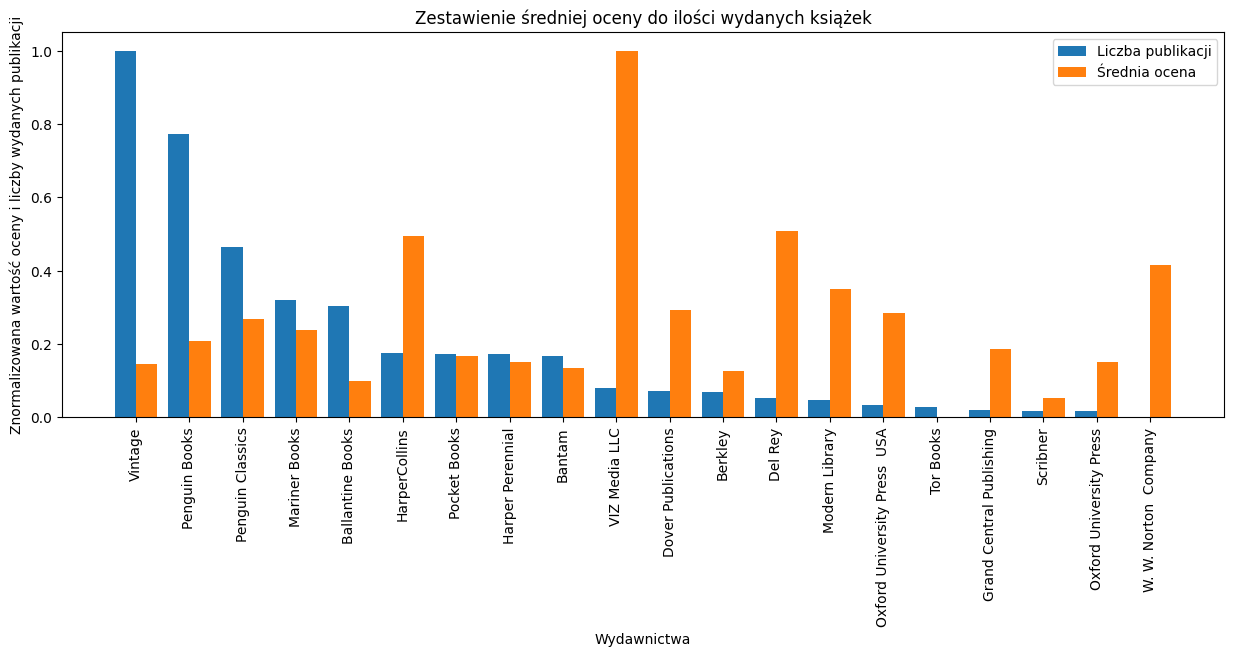

In [404]:
plt.figure(figsize=(15, 5))
x = publisher_rating['publisher']
y_rating = publisher_rating['average_rating']
z_published = publisher_count['title']
  
x_axis = np.arange(len(x))
  
plt.bar(x_axis - 0.2, z_published, 0.4, label = 'Liczba publikacji')
plt.bar(x_axis + 0.2, y_rating, 0.4, label = 'Średnia ocena' )
  
plt.xticks(x_axis, x, rotation=90)
plt.xlabel("Wydawnictwa")
plt.ylabel("Znormalizowana wartość oceny i liczby wydanych publikacji")
plt.title("Zestawienie średniej oceny do ilości wydanych książek")
plt.legend()
plt.show()

> Można wnioskować brak istnienia korelacji między zmiennymi.

#### Podsumowanie

Po dokonaniu analizy pomyślnie zauważono występujące zależności między poszczególnymi cechami zbioru. Związki zostały przedstawione wizualnie za pomocą wykresów. Przed przystąpieniem do analizy wykonano podstawowe czyszczenie danych oraz drobne korekty, które umożliwiły wykonanie poźniejszych kroków. Analiza umożliwiła dokonanie obserwacji ciekawych zależności i lepsze zrozumienie danych z wykorzystanego zbioru.